In [83]:
!pip install fredapi


to avoid from seeing all the outputs of the pip install

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500) 
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'mykey'

* pd.set_option('display.max_columns', 500) 
it enable to see up to 500 columns instead of too wide dataframe

* color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
this color palette is it'll be a list of colors that we can use to chage the colors in our plots. The plots will be different color each other. 


# 1. Create The Fred Object

In [85]:
fred = Fred(api_key=fred_key)

# 2. Search for economic data

In [86]:
sp_search = fred.search('S&P', order_by='popularity')

In [87]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-04-10   2024-04-10   
CSUSHPINSA          CSUSHPINSA     2024-04-10   2024-04-10   
SP500                    SP500     2024-04-10   2024-04-10   
MEHOINUSA672N    MEHOINUSA672N     2024-04-10   2024-04-10   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-04-10   2024-04-10   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-04-08  Daily, Close   
CSUSHPINSA            1987-01-01      2024-01-01       Monthly   
SP500                 2014-04-10      2024-04-09  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-04-08  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-04-09 08:44:07-05:00   
CSUSHPINSA                           NSA  2024-03-26 08:11:02-05:00   
SP500                                NSA  2024-04-09 19:10:58-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-04-09 08:44:10-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

# 3. Pull Raw Data & Plot

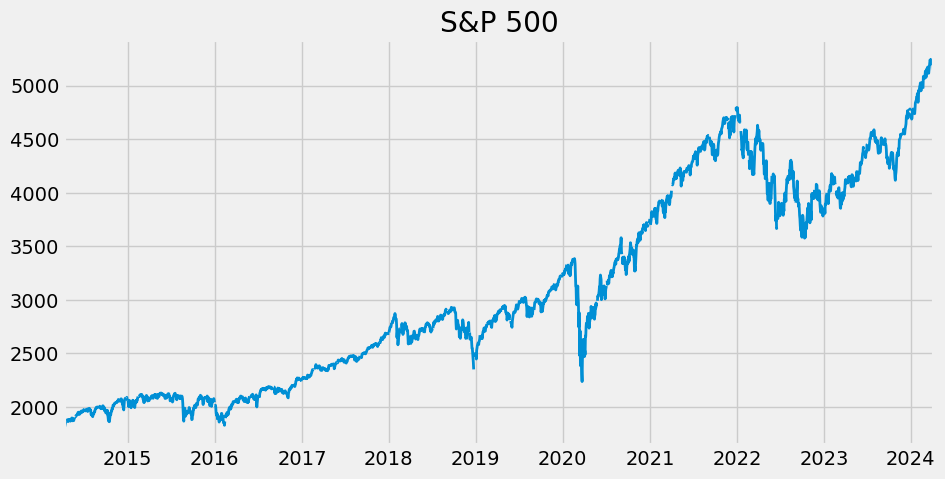

In [88]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

# 4. Pull and Join Multiple Data Series

In [89]:
unemp_result = fred.search('unemployment')

In [90]:
unemp_result

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-04-10   2024-04-10   
UNRATENSA                          UNRATENSA     2024-04-10   2024-04-10   
UNEMPLOY                            UNEMPLOY     2024-04-10   2024-04-10   
NROU                                    NROU     2024-04-10   2024-04-10   
CCSA                                    CCSA     2024-04-10   2024-04-10   
...                                      ...            ...          ...   
LAUMT134234000000003A  LAUMT134234000000003A     2024-04-10   2024-04-10   
LRHUTTTTUSQ156S              LRHUTTTTUSQ156S     2024-04-10   2024-04-10   
SAND706UR                          SAND706UR     2024-04-10   2024-04-10   
LNU04000029                      LNU04000029     2024-04-10   2024-04-10   
BUFF336UR                          BUFF336UR     2024-04-10   2024-04-10   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUMT134234000000003A            Unemployment Rate in Savannah, GA (MSA)   
LRHUTTTTUSQ156S        Harmonized Unemployment: Monthly Rates: Total:...   
SAND706UR              Unemployment Rate in San Diego-Carlsbad, CA (MSA)   
LNU04000029              Unemployment Rate - 20 Yrs. & over, White Women   
BUFF336UR              Unemployment Rate in Buffalo-Cheektowaga-Niaga...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-03-01   
UNRATENSA                    1948-01-01      2024-03-01   
UNEMPLOY                     1948-01-01      2024-03-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-03-23   
...                                 ...             ...   
LAUMT134234000000003A        1990-01-01      2022-01-01   
LRHUTTTTUSQ156S              1960-01-01      2023-10-01   
SAND706UR                    1990-01-01      2024-02-01   
LNU04000029                  1954-01-01      2024-03-01   
BUFF336UR                    1990-01-01      2024-02-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUMT134234000000003A                   Annual               A   
LRHUTTTTUSQ156S                      Quarterly               Q   
SAND706UR                              Monthly               M   
LNU04000029                            Monthly               M   
BUFF336UR                              Monthly               M   

                                      units        units_short  \
series id                                                        
UNRATE                              Percent                  %   
UNRATENSA                           Percent                  %   
UNEMPLOY               Thousands of Persons  Thous. of Persons   
NROU                                Percent                  %   
CCSA                                 Numb

### Pull a seasonally adjusted monthle unemployment rate, UNRATE 

In [91]:
unrate = fred.get_series('UNRATE')

<Axes: >

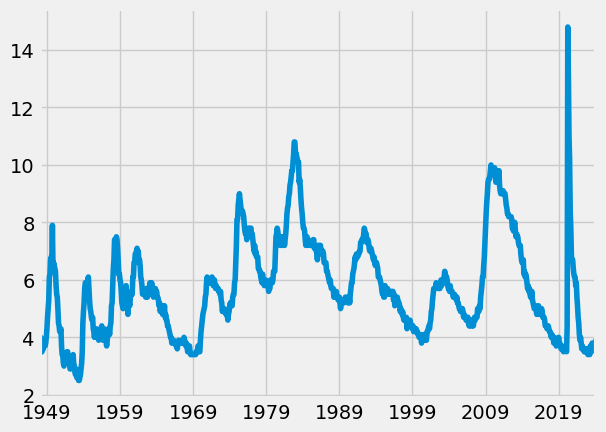

In [92]:
unrate.plot()

## Search the data of the unemployment rate in the states 

In [93]:
unemp_df = fred.search('unemployment state', filter = ('frequency', 'Monthly'))

In [94]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-04-10   2024-04-10   
LNS14000006            LNS14000006     2024-04-10   2024-04-10   
U6RATE                      U6RATE     2024-04-10   2024-04-10   
CAUR                          CAUR     2024-04-10   2024-04-10   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-04-10   2024-04-10   
...                            ...            ...          ...   
LNS14000089            LNS14000089     2024-04-10   2024-04-10   
M08311USM156SNBR  M08311USM156SNBR     2024-04-10   2024-04-10   
LNS14000150            LNS14000150     2024-04-10   2024-04-10   
LNS13023570            LNS13023570     2024-04-10   2024-04-10   
M08320USM156SNBR  M08320USM156SNBR     2024-04-10   2024-04-10   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
U6RATE            Total Unemployed, Plus All Persons Marginally ...   
CAUR                                Unemployment Rate in California   
M0892AUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
M08311USM156SNBR  Unemployment Rate, Married Males, Spouse Prese...   
LNS14000150                         Unemployment Rate - Married Men   
LNS13023570           New Entrants as a Percent of Total Unemployed   
M08320USM156SNBR  Unemployment Rate, Per Cent of Persons Unemplo...   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-03-01   Monthly               M   
LNS14000006             1972-01-01      2024-03-01   Monthly               M   
U6RATE                  1994-01-01      2024-03-01   Monthly               M   
CAUR                    1976-01-01      2024-02-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000089             1948-01-01      2024-03-01   Monthly               M   
M08311USM156SNBR        1954-11-01      1968-01-01   Monthly               M   
LNS14000150             1955-01-01      2024-03-01   Monthly               M   
LNS13023570             1967-01-01      2024-03-01   Monthly               M   
M08320USM156SNBR        1948-01-01      1969-04-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
U6RATE            Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000089       Percent           %  Seasonally Adjusted   
M08311USM156SNBR  Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LNS13023570       Percent           %  Seasonally Adjusted   
M08320USM156SNBR  Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-04-05 07:50:02-05:00   
LNS14000006                             SA  2024-04-05 07:50:16-05:00   
U6RATE                                  SA  2024-04-05 07:50:20-05:00   
CAUR                                

In [147]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [148]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1)

### Make the umemployment rate in the states 

In [149]:
cols_to_drop = []
for i in unemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_results = unemp_results.drop(columns = cols_to_drop, axis=1)

if len(i) > 4:
        cols_to_drop.append(i)
- if a title of a column has a longer spell than 4, it will append the list "cols_to_drop"

In [150]:
unemp_states = unemp_results.copy()

### Check when it started to collect the data

In [ ]:
unemp_states.isna().sum(axis=1).plot()

### Remove null 

In [134]:
unemp_states.dropna()

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   5.1   3.9   4.6   3.1   3.4   3.6   4.2   2.8   3.4   3.6   4.8   
2023-11-01   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.3   3.6   4.7   
2023-12-01   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.2   3.6   4.7   
2024-01-01   5.2   3.9   4.5   3.1   3.4   3.7   4.0   2.9   3.0   3.5   4.7   
2024-02-01   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   3.5   4.8   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   2.8   3.5   
2023-11-01   4.8   3.2   3.3   4.2   3.4   3.1   4.3   3.0   4.0   2.7   3.5   
2023-12-01   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   2.7   3.4   
2024-01-01   4.8   3.1   3.4   4.2   3.2   3.0   4.3   3.0   4.0   2.7   3.5   
2024-02-01   4.8   3.1   3.5   4.1   3.0   3.0   4.4   3.1   3.9   2.7   3.3   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   4.4   2.3   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.1   2.8   
2023-11-01   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.1   2.8   
2023-12-01   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-01-01   4.6   2.3   4.1   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-02-01   4.7   2.4   4.2   4.3   5.2   3.6   3.6   3.3   4.7   2.9   2.8   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
1976-01-01  19.6   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-02-01  19.5   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-03-01  19.3   6.5   6.3   9.8   3.4   5.8   8.6   6.6   8.6   3.3   9.8   
1976-04-01  19.0   6.3   6.4   9.7   3.5   5.8   8.5   6.4   8.6   3.2   9.6   
1976-05-01  18.9   6.0   6.5   9.4   3.6   5.8   8.4   6.3   8.5   3.1   9.4   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   5.6   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   
2023-11-01   5.6   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   
2023-12-01   5.7   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   
2024-01-01   5.7   3.5   4.1   3.1   1.9   3.3   5.0   3.2   3.4   2.5   4.4   
2024-02-01   5.7   3.5   4.2   3.1   2.0   3.4   5.1   3.1   3.4   2.5   4.5   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1976-01-01   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3  
1976-02-01   5.6   6.5   7.8   4.2   4.1   8.0

### Plot the unemployment rate in the states

In [152]:
unemp_states = unemp_results.copy()
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
- I'd like to use the actual states name instead of the shortcut one
- fetch the part of "title" from "unemp_df" and remove "Unemployment Rate in"
- set the dictionary between a shortcut name and a proper name

In [153]:
px.line(unemp_states)

# Pull May 2020 Unemployment Rate Per State

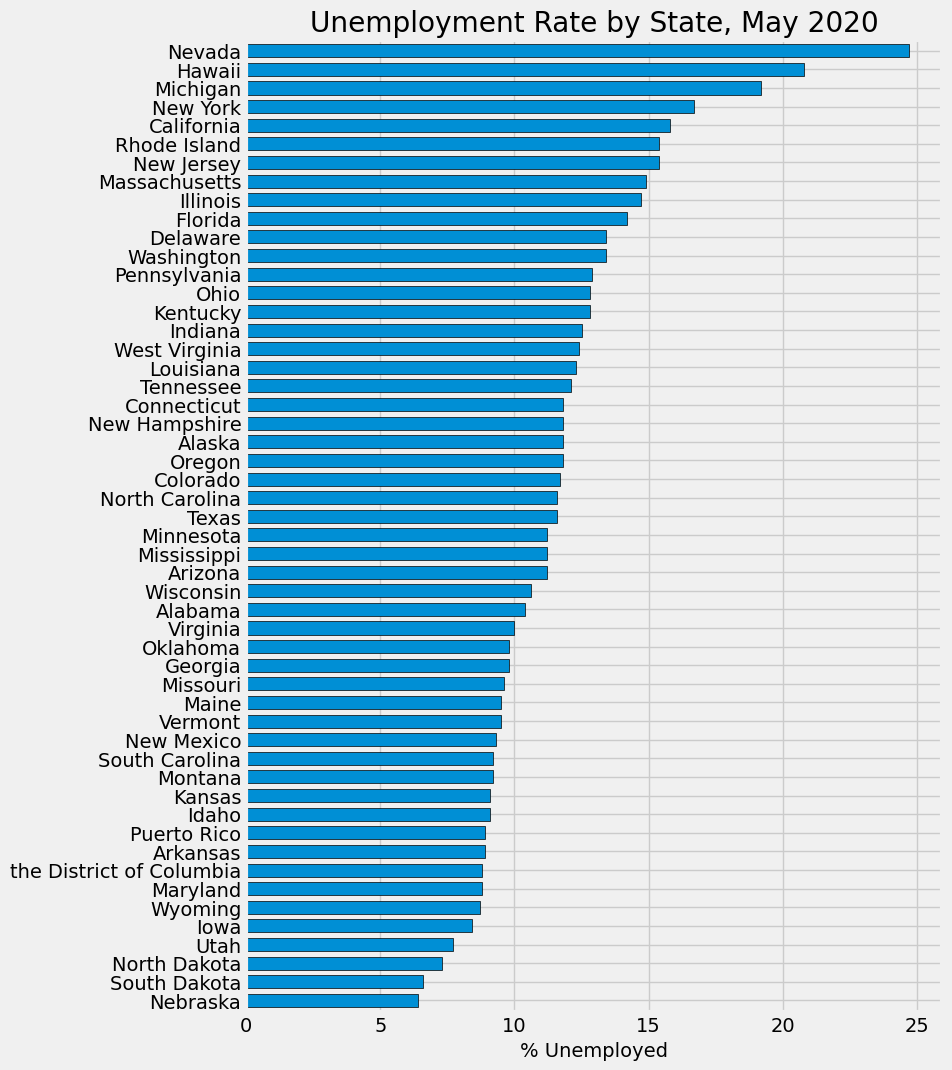

In [154]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull the participation rate in the states

In [156]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]


In [157]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)

In [158]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '')

In [159]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [142]:
part_states

California  Alabama  New York  Michigan  Mississippi  Texas  \
1976-01-01        62.6     57.0      58.0      61.6         58.8   63.8   
1976-02-01        62.4     56.9      58.0      61.5         58.6   63.5   
1976-03-01        62.2     56.8      58.0      61.5         58.5   63.4   
1976-04-01        62.2     56.8      58.0      61.6         58.5   63.5   
1976-05-01        62.3     56.8      58.1      61.7         58.5   63.6   
...                ...      ...       ...       ...          ...    ...   
2023-10-01        62.1     57.5      61.4      62.3         53.9   64.4   
2023-11-01        62.0     57.5      61.4      62.3         53.8   64.3   
2023-12-01        62.1     57.4      61.5      62.3         53.8   64.2   
2024-01-01        62.1     57.4      61.4      62.3         53.8   64.1   
2024-02-01        62.1     57.4      61.4      62.2         53.7   64.1   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1976-01-01     55.8      60.5  61.7       65.6          58.4           64.8   
1976-02-01     55.7      60.3  61.7       65.5          58.3           64.7   
1976-03-01     55.5      60.2  61.7       65.4          58.3           64.6   
1976-04-01     55.5      60.1  61.6       65.4          58.3           64.6   
1976-05-01     55.4      60.1  61.6       65.5          58.3           64.6   
...             ...       ...   ...        ...           ...            ...   
2023-10-01     59.6      57.0  61.8       66.0          62.3           65.0   
2023-11-01     59.5      57.0  61.8       66.0          62.3           64.9   
2023-12-01     59.5      56.9  61.8       65.9          62.3           64.9   
2024-01-01     59.4      56.9  61.8       65.9          62.4           64.9   
2024-02-01     59.4      56.9  61.8       65.7          62.5           64.8   

            Minnesota  Maryland  West Virginia  Tennessee  Maine  Illinois  \
1976-01-01       65.6      64.3           52.5       59.6   62.1      63.0   
1976-02-01       65.5      64.2           52.4       59.4   61.9      63.0   
1976-03-01       65.4      64.1           52.3       59.3   61.9      62.9   
1976-04-01       65.4      64.1           52.3       59.3   61.8      62.9   
1976-05-01       65.5      64.1           52.2       59.4   61.7      63.0   
...               ...       ...            ...        ...    ...       ...   
2023-10-01       68.1      65.3           55.2       59.6   59.4      64.5   
2023-11-01       68.1      65.2           55.2       59.6   59.4      64.5   
2023-12-01       68.0      65.1           55.2       59.5   59.3      64.5   
2024-01-01       68.0      65.1           55.3       59.5   59.3      64.6   
2024-02-01       67.9      65.0           55.2       59.5   59.3      64.6   

            North Carolina  Georgia  Louisiana  South Carolina  Colorado  \
1976-01-01            66.5     63.7       56.8            65.3      67.2   
1976-02-01            66.3     63.6       56.6            65.2      67.0   
1976-03-01            66.2     63.5       56.5            65.0      66.8   
1976-04-01            66.2     63.5       56.4            64.9      66.6   
1976-05-01            66.3     63.6       56.4            64.7      66.5   
...                    ...      ...        ...             ...       ...   
2023-10-01            60.9     61.6       58.6            57.4      68.4   
2023-11-01            60.8     61.5       58.6            57.3      68.3   
2023-12-01            60.7     61.5       58.6            57.2      68.3   
2024-01-01            60.7     61.4       58.7            57.2      68.1   
2024-02-01            60.7     61.4       58.7            57.1      68.1   

            Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  Alaska  \
1976-01-01  62.8      65.9     64.0      60.5        61.5  64.4    69.0   
1976-02-01  62.6      65.8     63.9      60.3        61.4  64.3    68.4   
1976-03-01  62.5      65.6     63.8      60.3        61.4  64.2    67.8   
1976-04-01  

In [160]:
# Plot States Participating Rate
px.line(part_states)

# Plot Unemployment vs Participation for each state

In [120]:
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah',
       'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota',
       'Montana', 'District Of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota'],
      dtype='object')

In [161]:
# Fix DC
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

### the first attempt to plot both the unemployment rate and the participation rate

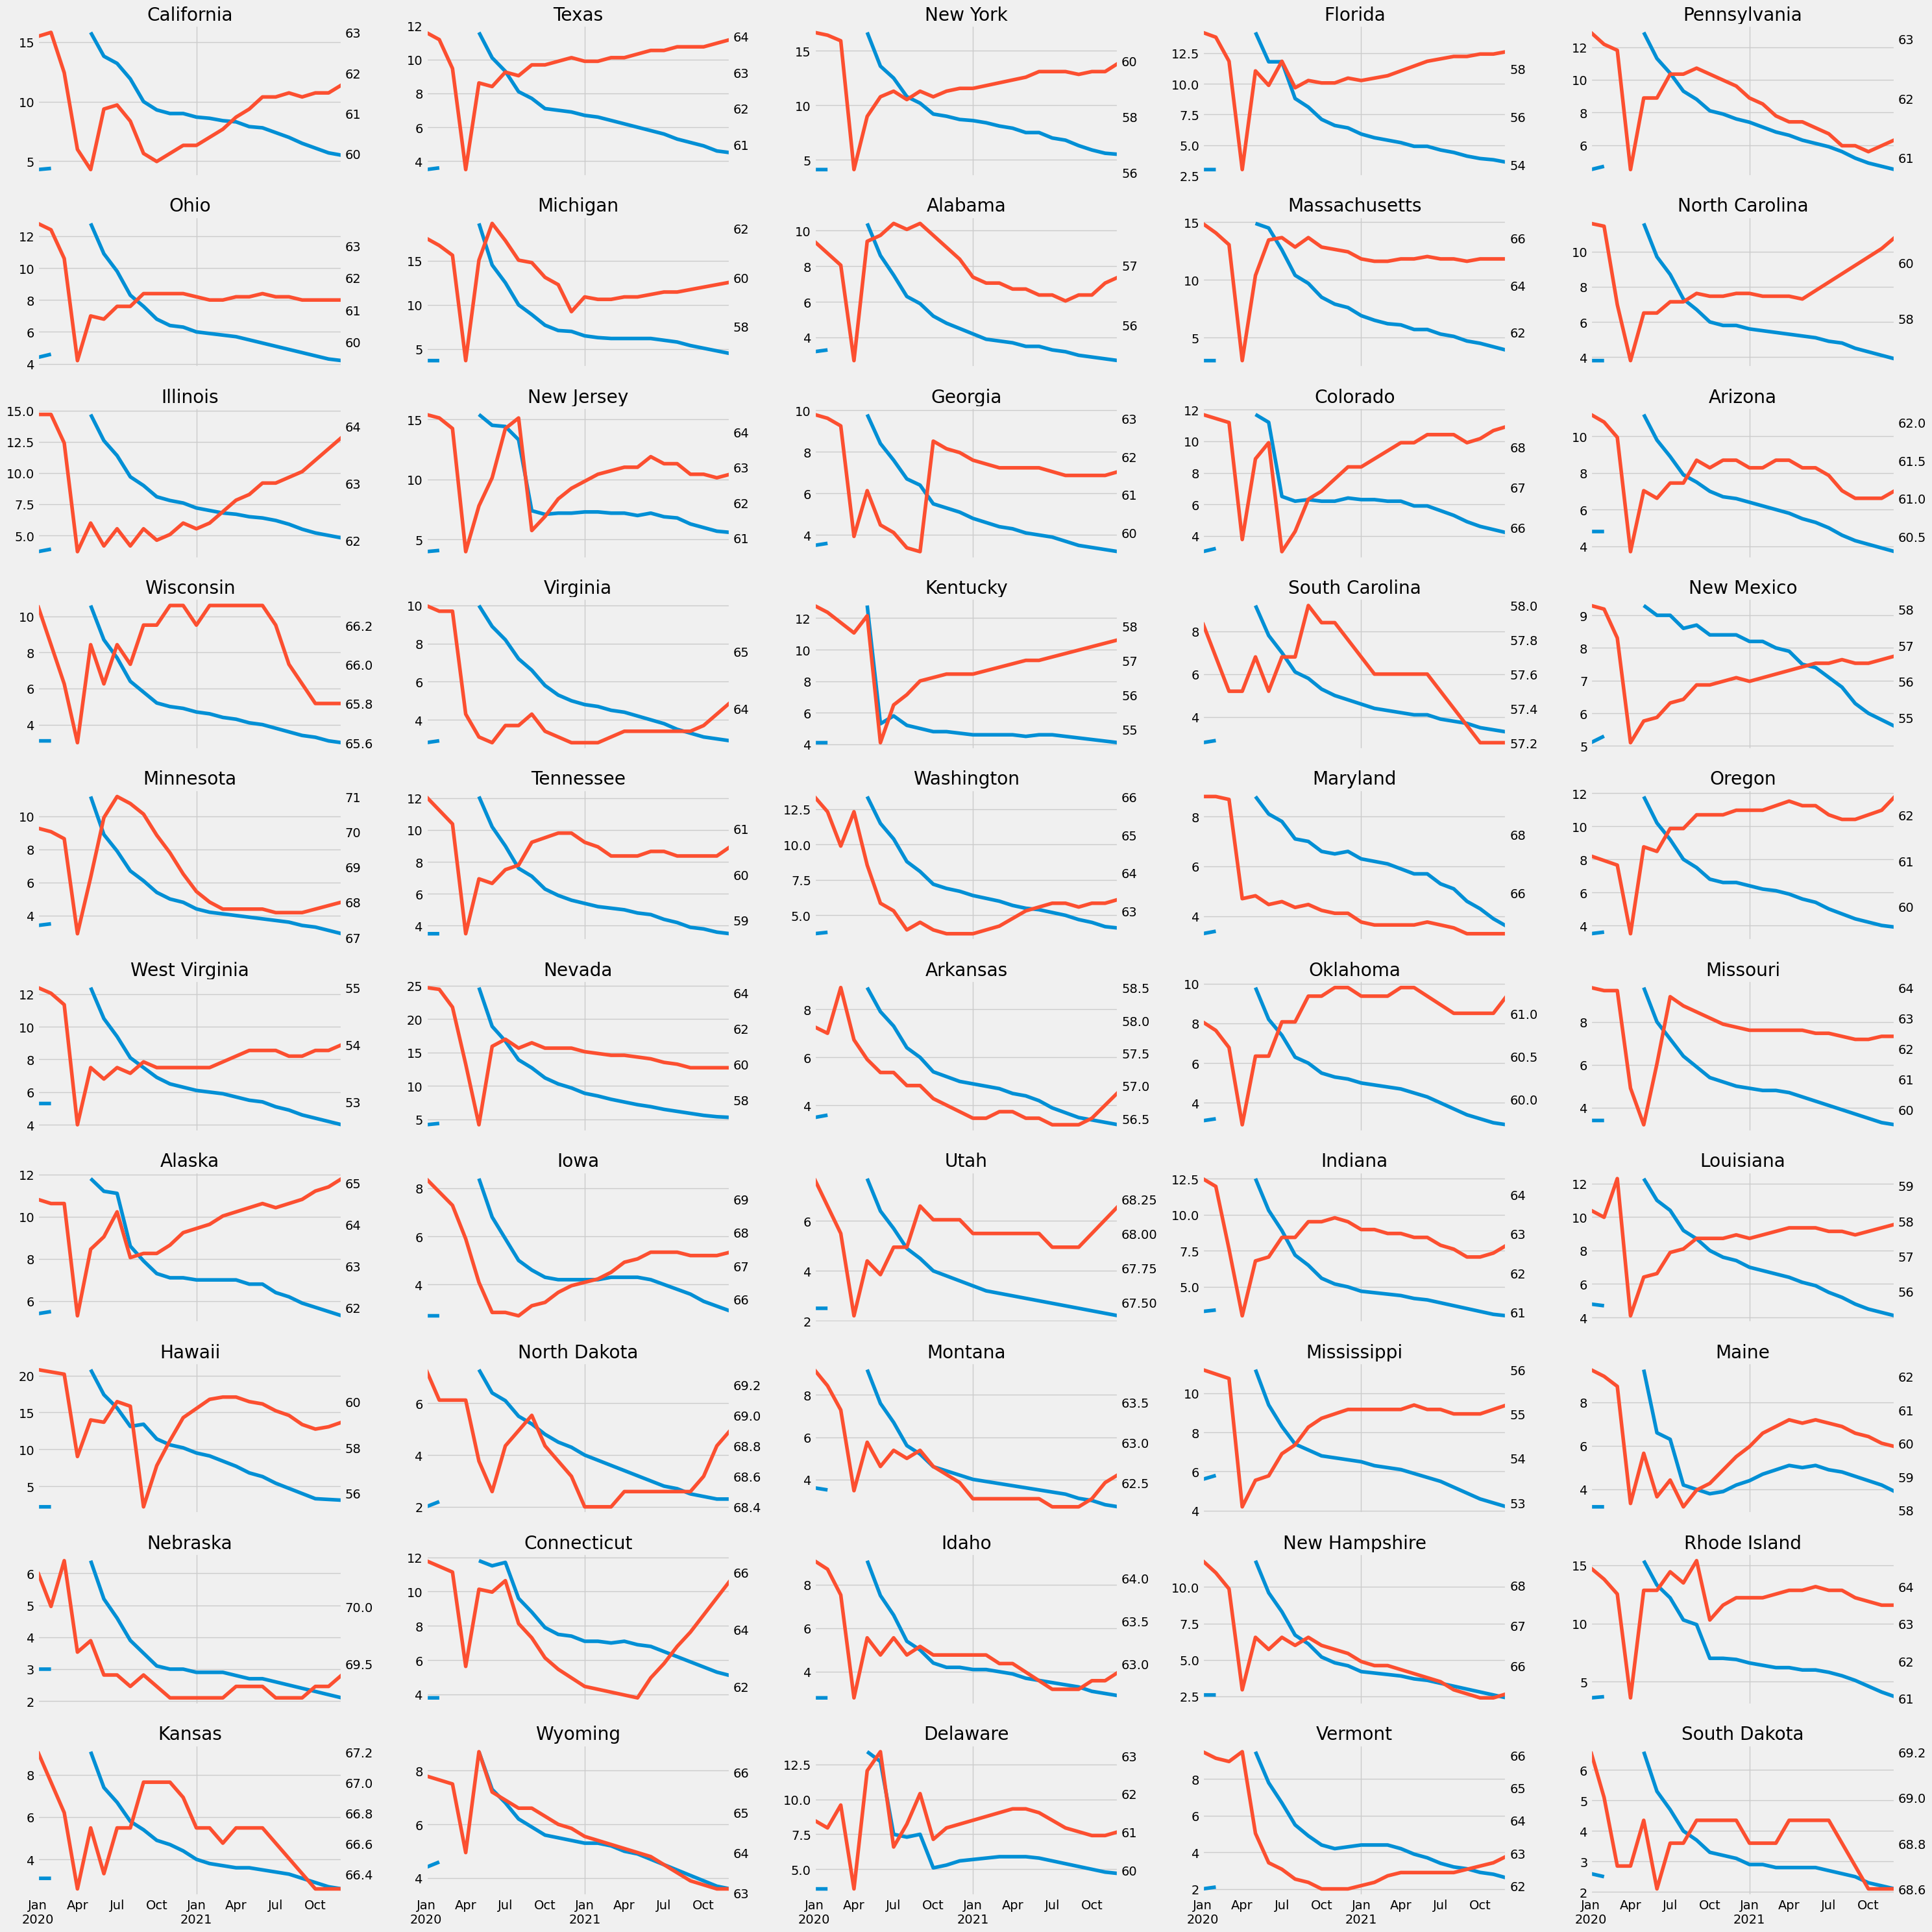

In [227]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()
unemp_states = unemp_states.asfreq('MS')
i = 0
for state in unemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()


It seems that some data of the unemployment have null

### Pick up one as a sample from California

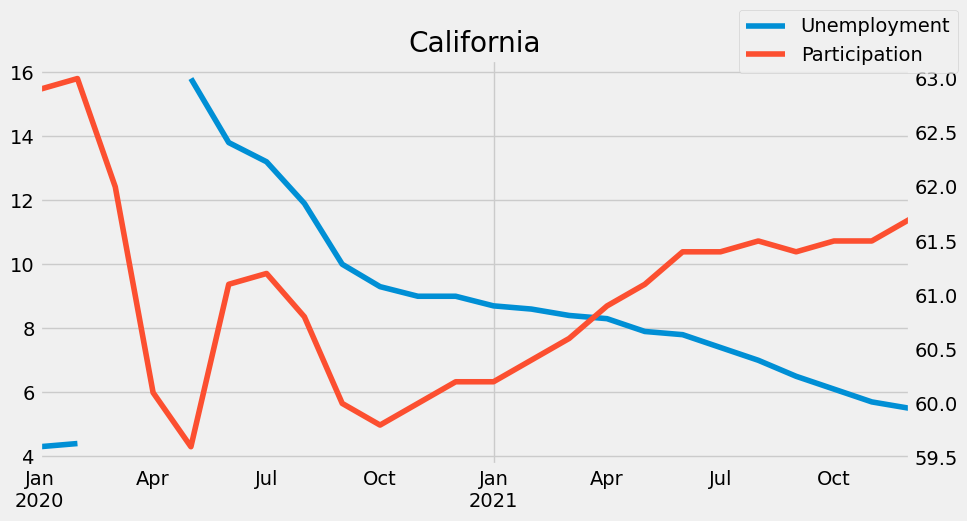

In [226]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_states2 = unemp_states.asfreq('MS')
l1 = unemp_states2.query('index >= 2020 and index < 2022')[state].plot(ax=ax, label='Unemployment')
l2 = part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()


In [224]:
print(unemp_states2.query('index >= 2020 and index < 2022')[state])

2020-01-01     4.3
2020-02-01     4.4
2020-03-01     NaN
2020-04-01     NaN
2020-05-01    15.8
2020-06-01    13.8
2020-07-01    13.2
2020-08-01    11.9
2020-09-01    10.0
2020-10-01     9.3
2020-11-01     9.0
2020-12-01     9.0
2021-01-01     8.7
2021-02-01     8.6
2021-03-01     8.4
2021-04-01     8.3
2021-05-01     7.9
2021-06-01     7.8
2021-07-01     7.4
2021-08-01     7.0
2021-09-01     6.5
2021-10-01     6.1
2021-11-01     5.7
2021-12-01     5.5
Freq: MS, Name: California, dtype: float64


### Complete missing value
- Using 'interpolate()' complements null with an estimated value based on the values before and after it
- 'interpolate(method='time')' is highly effective in especially the index that is a date or time. 

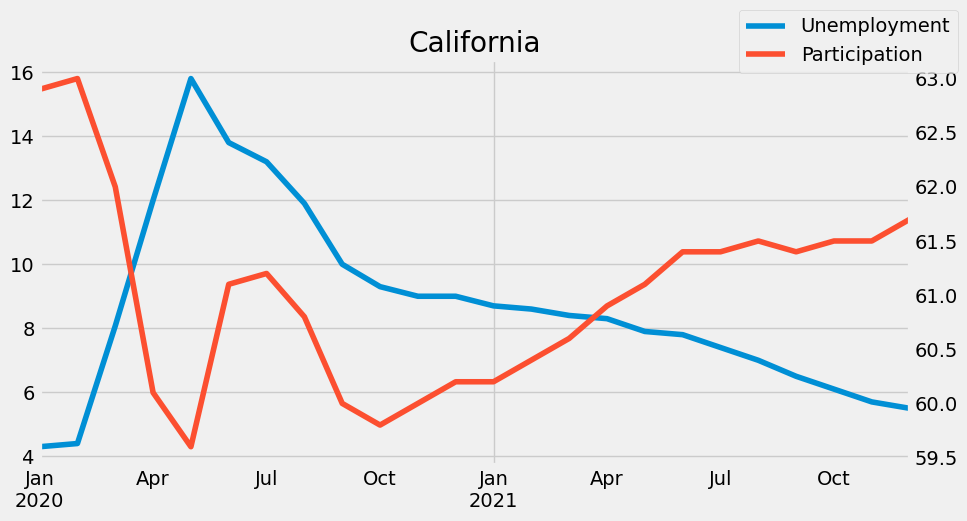

In [219]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_states2 = unemp_states.asfreq('MS')
l1 = unemp_states2.query('index >= 2020 and index < 2022')[state].interpolate(method='time').plot(ax=ax, label='Unemployment')
l2 = part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()


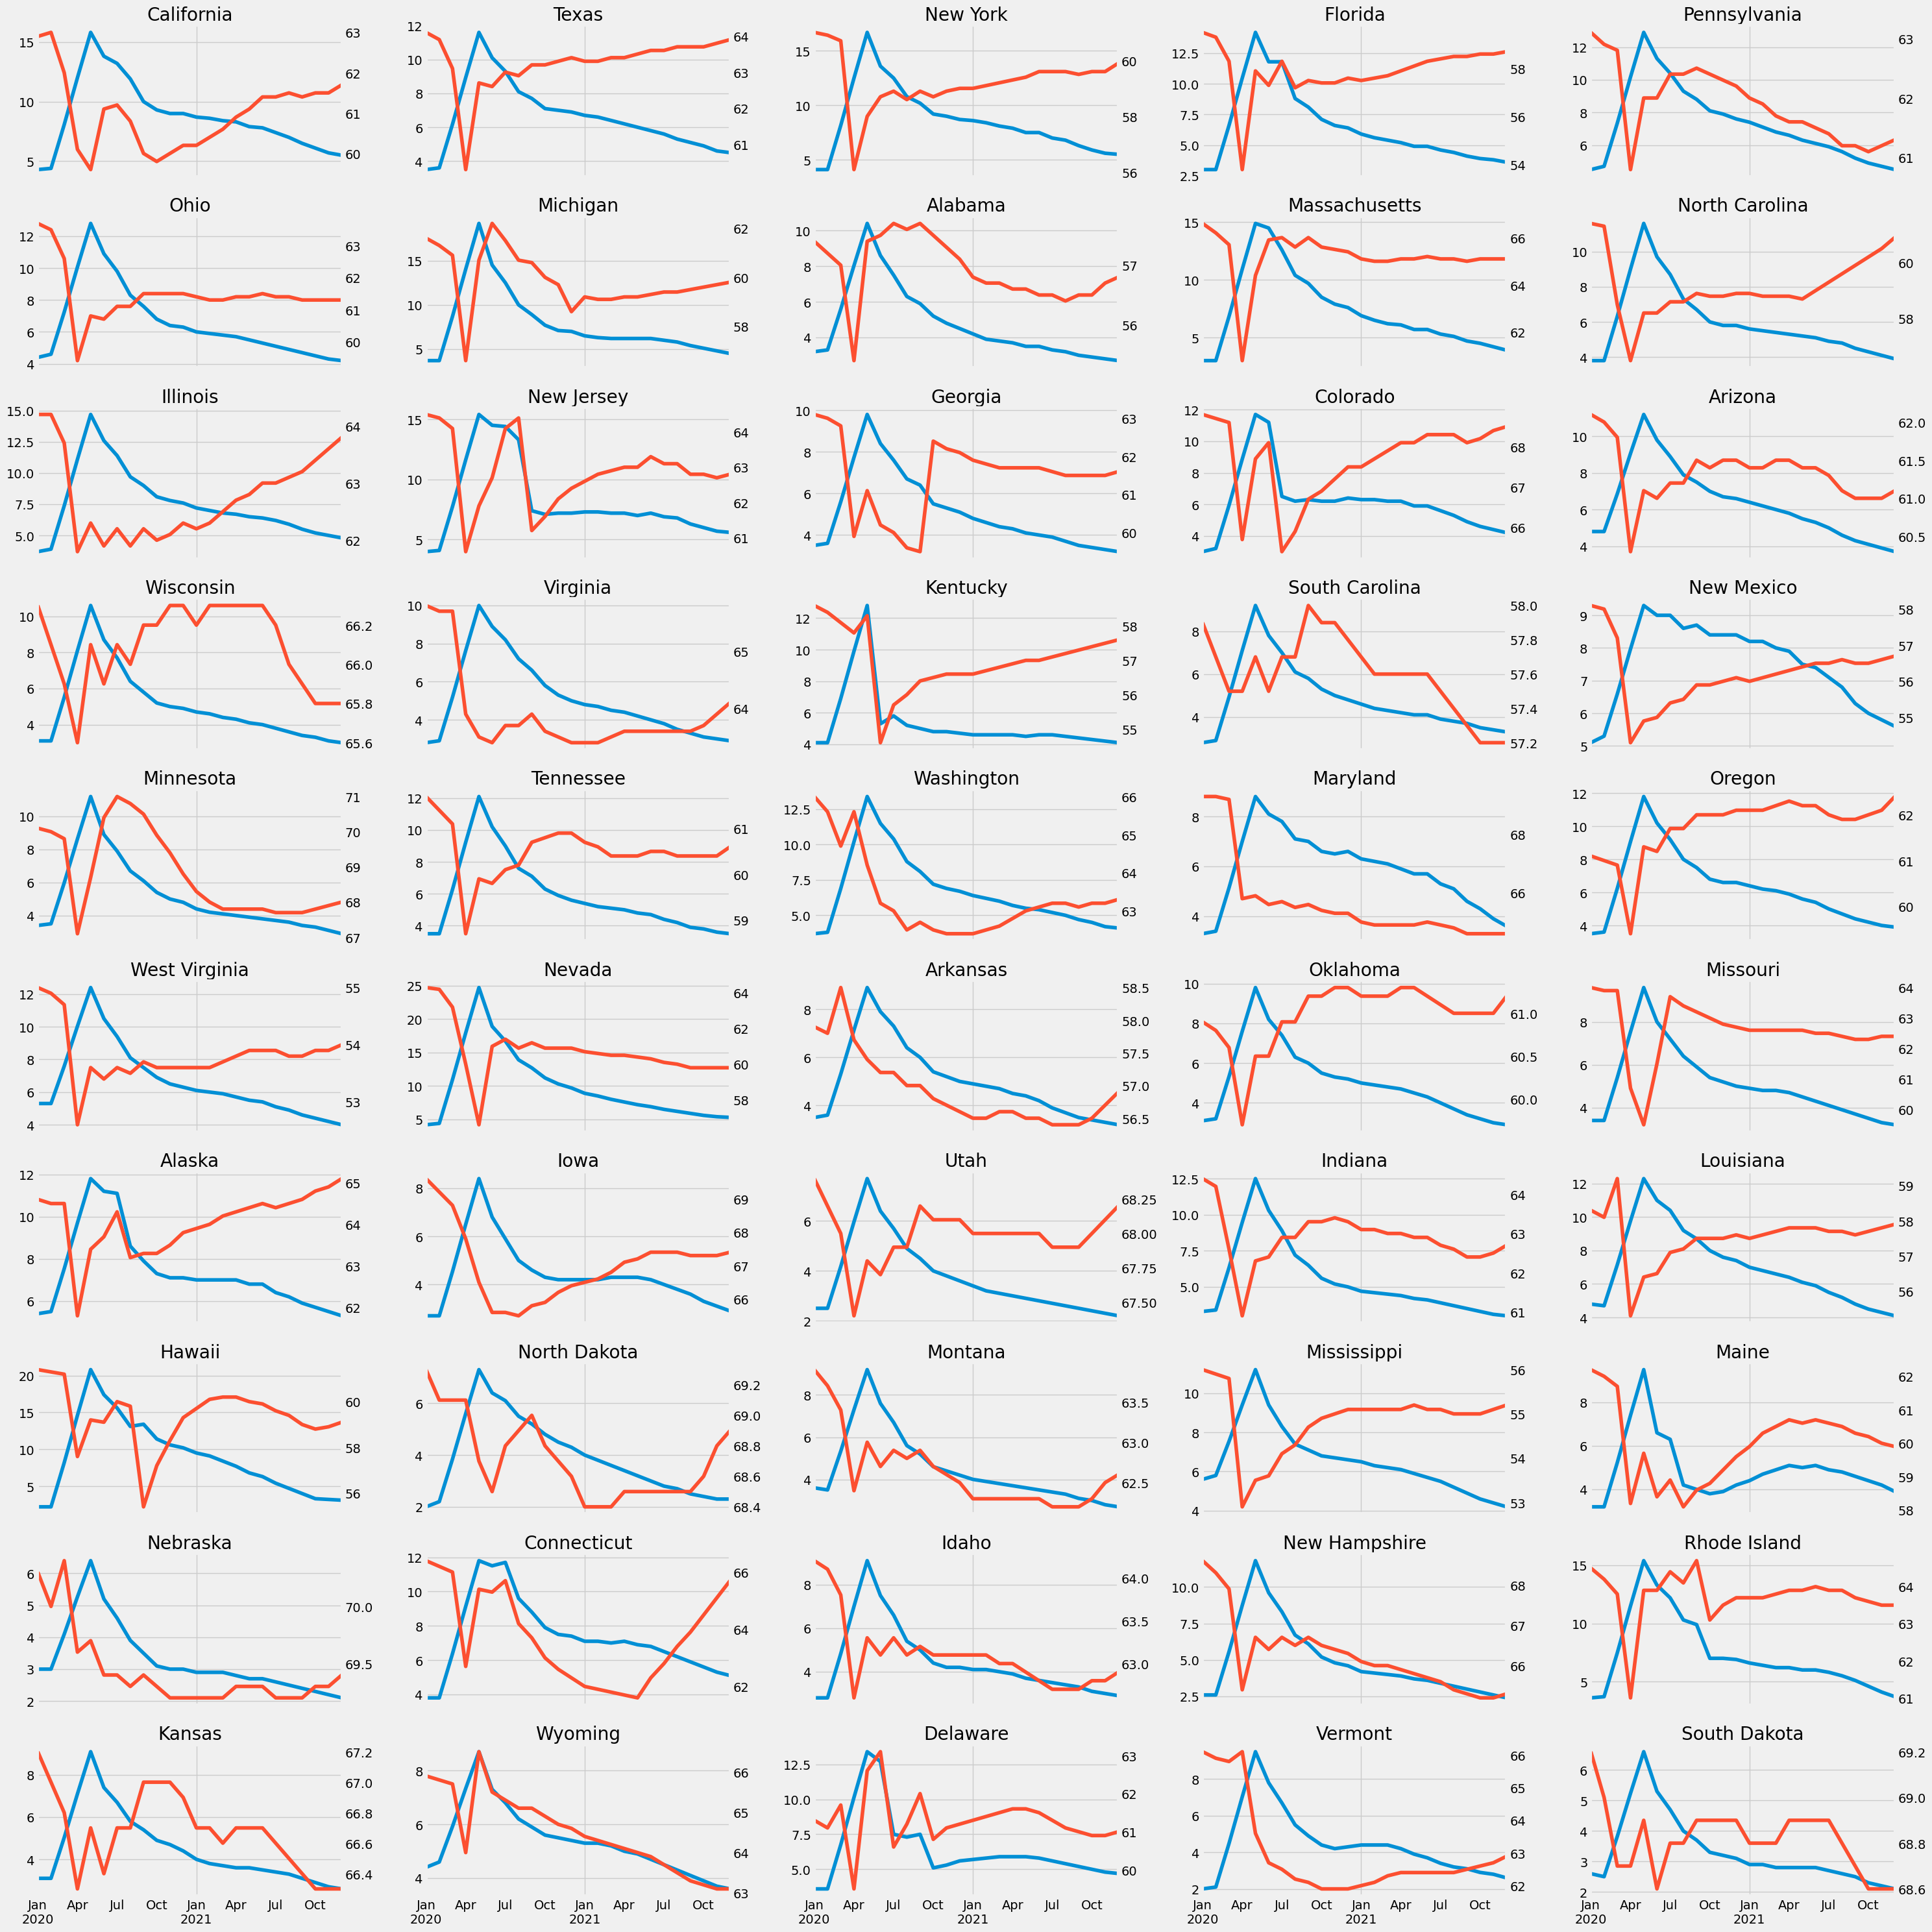

In [220]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()
unemp_states2 = unemp_states.asfreq('MS')
i = 0
for state in unemp_states2.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemp_states2.query('index >= 2020 and index < 2022')[state].interpolate(method='time') \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()